# Nonlinear Equations

We want to find a root of the nonlinear function $f$ using different methods.

1. Bisection method
2. Newton method
3. Chord method
4. Secant method
5. Fixed point iterations





In [2]:
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
import sympy as sym


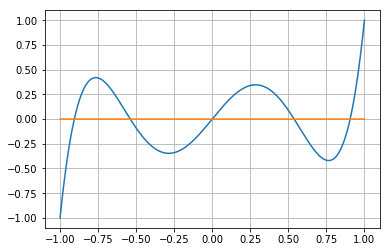

In [9]:
t = sym.symbols('t')

f_sym = t/8. * (63.*t**4 - 70.*t**2. +15.) # Legendre polynomial of order 5

f_prime_sym = sym.diff(f_sym,t) #computing the derivative f'(t) respect to t, nedded for Newton Method

#the following 2 lines are technical: we are allowing the symbol t to be replaced by any numerical value.
#so that we can call f(0.5) and it has meaning. Before, f is just a symbol, now it's an actual computed function
f = sym.lambdify(t, f_sym, 'numpy')
f_prime = sym.lambdify(t,f_prime_sym, 'numpy')

phi = lambda x : 63./70.*x**3 + 15./(70.*x)
#phi = lambda x : 70.0/15.0*x**3 - 63.0/15.0*x**5
#phi = lambda x : sqrt((63.*x**4 + 15.0)/70.)

# Let's plot
n = 1025 #number of points

x = linspace(-1,1,n)
c = zeros_like(x)

_ = plot(x,f(x))
_ = plot(x,c)
_ = grid()

#having a look at the function and its zeros it's the first step

In [10]:
# Initial data for the variuos algorithms

# interval in which we seek the solution 
a = 0.7
b = 1.

# initial points
x0 = (a+b)/2.0
x00 = b


In [11]:
# stopping criteria
eps = 1e-10
n_max = 1000

## Bisection method

$$
x^k = \frac{a^k+b^k}{2}
$$
```
                   if (f(a_k) * f(x_k)) < 0:
                      b_k1 = x_k
                      a_k1 = a_k
                   else:
                      a_k1 = x_k
                      b_k1 = b_k
```

Number of iterations:   32
Zero of the function:   0.90617984595
Error associated:   7.85726162187e-11
    
                          Error plot (semilog)


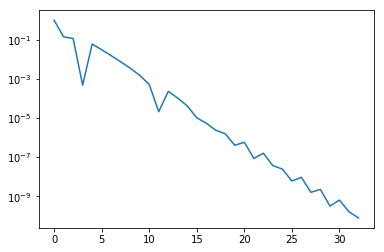

In [85]:
def bisect(f,a,b,eps,n_max):
    assert f(a)*f(b)<0
    a_new = a
    b_new = b
    x = mean([a,b])
    err = eps + 1.
    errors = [err]
    it = 0
    while (err > eps and it < n_max):
        if ( f(a_new) * f(x) < 0 ):  #choose starting points so that f(x1)*f(x2)<0
            # root in (a_new,x)
            b_new = x
        else:
            # root in (x,b_new)
            a_new = x
        
        x_new = mean([a_new,b_new])
        
        #err = 0.5 *(b_new -a_new)
        err= abs(f(x_new))
        #err = abs(x-x_new)
        
        errors.append(err) #create a list of error to plot later
        x = x_new
        it += 1
    
    
    semilogy(errors) #semilog graph of the error
    print ("Number of iterations:  ",it)
    print ("Zero of the function:  ",x)
    print ("Error associated:  ",err)
    print ("    ")
    print ("                          Error plot (semilog)")
    return errors

#equivalent to the main
errors_bisect = bisect(f,a,b,eps,n_max)
          
        

In [15]:
# is the number of iterations coherent with the theoretical estimation?

In order to find out other methods for solving non-linear equations, let's compute the Taylor's series of $f(x^k)$ up to the first order 

$$
f(x^k) \simeq f(x^k) + (x-x^k)f^{\prime}(x^k)
$$
which suggests the following iterative scheme
$$
x^{k+1} = x^k - \frac{f(x^k)}{f^{\prime}(x^k)}
$$

The following methods are obtained applying the above scheme where

$$
f^{\prime}(x^k) \approx q^k
$$

## Newton's method
$$
q^k = f^{\prime}(x^k)
$$

$$
x^{k+1} = x^k - \frac{f(x^k)}{q^k}
$$

Number of iterations:   10
Zero of the function:   -0.9061798459426995
Error associated:   2.7725451563961656e-11
    
                          Error plot (semilog)
CPU times: user 92.4 ms, sys: 3.95 ms, total: 96.4 ms
Wall time: 93.8 ms


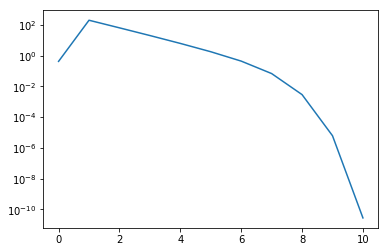

In [87]:
def newton(f,f_prime,x0,eps,n_max):
    x=x0
    err=abs(f(x0))
    errors=[err]
    it=0
    while (err > eps and it < n_max):
        q=f_prime(x)
        x= x- (f(x)/q)
        it+=1
        err= abs(f(x))
        errors.append(err) #create a list of error to plot later
    
    semilogy(errors) #semilog graph of the error
    print ("Number of iterations:  ",it)
    print ("Zero of the function:  ",x)
    print ("Error associated:  ",err)
    print ("    ")
    print ("                          Error plot (semilog)")
    return errors
    
%time errors_newton = newton(f,f_prime,0.76,eps,n_max) #jupyter time it takes to evaluate

## Chord method

$$
q^k \equiv q = \frac{f(b)-f(a)}{b-a}
$$

$$
x^{k+1} = x^k - \frac{f(x^k)}{q}
$$

Number of iterations:   32
Zero of the function:   0.9061798459511422
Error associated:   8.573014178663546e-11
    
                          Error plot (semilog)
CPU times: user 83 ms, sys: 3.99 ms, total: 86.9 ms
Wall time: 84 ms


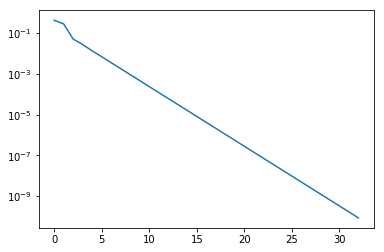

In [88]:
def chord(f,a,b,x0,eps,n_max):
    x=x0
    err=abs(f(x0))
    errors=[err]
    it=0
    while (err>eps and it<n_max):
        q= (f(b)-f(a))/(b-a)
        x=x-(f(x)/q)
        err=abs(f(x))
        errors.append(err)
        it+=1
    semilogy(errors) #semilog graph of the error
    print ("Number of iterations:  ",it)
    print ("Zero of the function:  ",x)
    print ("Error associated:  ",err)
    print ("    ")
    print ("                          Error plot (semilog)")
    return errors


%time errors_chord = chord (f,a,b,0.76,eps,n_max)

## Secant method

$$
q^k = \frac{f(x^k)-f(x^{k-1})}{x^k - x^{k-1}}
$$

$$
x^{k+1} = x^k - \frac{f(x^k)}{q^k}
$$

Note that this algorithm requirs **two** initial points

Number of iterations:   10
Zero of the function:   0.906179845938679
Error associated:   1.0302072109182961e-13
    
                          Error plot (semilog)
CPU times: user 90.3 ms, sys: 3.22 ms, total: 93.5 ms
Wall time: 92.1 ms


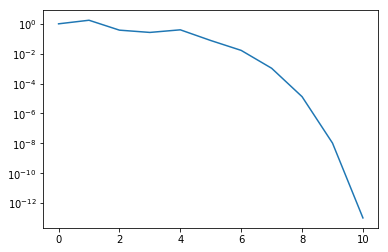

In [89]:
def secant(f,x0,x00,eps,n_max):
    err=eps+1
    errors=[err]
    it=0
    while (err>eps and it<n_max):
        q= (f(x00)-f(x0))/(x00-x0)
        x0=x00
        x00=x00-(f(x00)/q)
        err=abs(f(x00))
        errors.append(err)
        it+=1
    semilogy(errors) #semilog graph of the error
    print ("Number of iterations:  ",it)
    print ("Zero of the function:  ",x00)
    print ("Error associated:  ",err)
    print ("    ")
    print ("                          Error plot (semilog)")
    return errors


#errors_chord = chord (f,a,b,x0,eps,n_max)
    
%time errors_secant = secant(f,x0,0.76,eps,n_max)

## Fixed point iterations

$$
f(x)=0 \to x-\phi(x)=0
$$

$$
x^{k+1} = \phi(x^k)
$$

Number of iterations:   10
Zero of the function:   0.5384693101122793
Error associated:   1.6001516714091794e-11
    
                          Error plot (semilog)


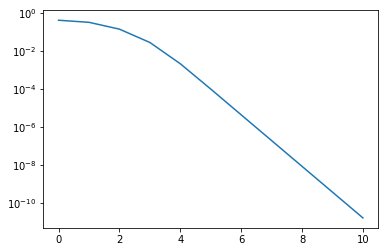

In [90]:
def fixed_point(phi,x0,eps,n_max):
    it=0
    x=x0
    err=abs(f(x0))
    errors=[err]
    while (err>eps and it<n_max):
        x=phi(x)
        err=abs(f(x))
        errors.append(err)
        it+=1
    semilogy(errors) #semilog graph of the error
    print ("Number of iterations:  ",it)
    print ("Zero of the function:  ",x)
    print ("Error associated:  ",err)
    print ("    ")
    print ("                          Error plot (semilog)")
    return errors


errors_fixed = fixed_point(phi,0.76,eps,n_max)
        

## Comparison

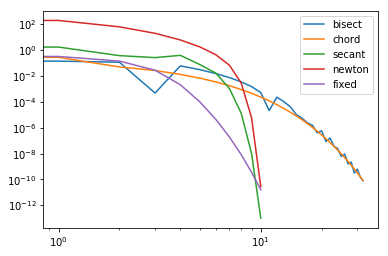

In [91]:
# plot the error convergence for the methods
loglog(errors_bisect, label='bisect')
loglog(errors_chord, label='chord')
loglog(errors_secant, label='secant')
loglog(errors_newton, label ='newton')
loglog(errors_fixed, label ='fixed')
_ = legend()

In [ ]:
# Let's compare the scipy implmentation of Newton's method with our..

In [68]:
import scipy.optimize as opt
%time opt.newton(f, 1.0, f_prime, tol = eps)

CPU times: user 36 µs, sys: 0 ns, total: 36 µs
Wall time: 39.6 µs


0.906179845938664